In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import warnings

In [2]:
''' to do list 
clean the data
make a new df with the other data
EDA
MODELING 
GRAPH
DONE
:)))
''' 


' to do list \nclean the data\nmake a new df with the other data\nEDA\nMODELING \nGRAPH\nDONE\n:)))\n'

In [2]:
df_overdose = pd.read_csv('overdose_county.csv')


In [3]:
df_overdose.head()

,County,County Code,Year,Year Code,Deaths,Population,Crude Rate
0,"Autauga County, AL",1001,1999,1999,361,42963,840.3
1,"Autauga County, AL",1001,2000,2000,356,43671,815.2
2,"Autauga County, AL",1001,2001,2001,362,44889,806.4
3,"Autauga County, AL",1001,2002,2002,388,45909,845.2
4,"Autauga County, AL",1001,2003,2003,400,46800,854.7


In [6]:
df_overdose.Deaths.isnull().sum()

0

In [4]:
len(df_overdose.Deaths)

58967

In [3]:
df_census = pd.read_csv('census.csv')

In [73]:
# df_census.head(100)

In [74]:
# df_census.info()

In [ ]:
# df_census.isnull().sum()

In [12]:
df_census.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,6.549900e+04,65499.000000,65499.000000,65499.000000,64942.000000,64942.000000,64942.000000,64942.000000,64942.000000,64942.000000,...,64841.000000,64841.000000,64841.000000,64703.00000,65499.000000,64832.000000,64832.000000,64832.000000,64832.000000,64837.000000
mean,2.505283e+10,4319.286600,2122.881418,2196.405182,16.169873,61.938681,13.910332,0.741968,4.722768,0.138146,...,3.117705,1.900925,4.372995,25.75005,1981.863036,79.312511,14.264288,6.253296,0.170235,9.103021
std,1.427529e+10,2140.361603,1076.862300,1102.539560,21.472354,30.508397,22.326223,4.607118,9.068013,1.060138,...,5.907337,2.649847,3.958335,6.99310,1073.251604,8.211349,7.384482,4.080611,0.462065,5.871624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.208601e+10,2880.000000,1402.000000,1455.000000,2.400000,38.900000,0.800000,0.000000,0.200000,0.000000,...,0.400000,0.400000,1.800000,20.90000,1250.000000,75.000000,9.400000,3.600000,0.000000,5.200000
50%,2.601197e+10,4048.000000,1978.000000,2060.000000,6.900000,71.000000,4.000000,0.000000,1.400000,0.000000,...,1.400000,1.100000,3.500000,25.10000,1842.000000,80.400000,13.100000,5.500000,0.000000,7.800000
75%,3.709097e+10,5430.000000,2667.000000,2770.000000,20.200000,88.300000,15.300000,0.400000,4.900000,0.000000,...,3.400000,2.500000,5.900000,29.90000,2544.000000,84.900000,17.700000,8.100000,0.000000,11.500000
max,4.834997e+10,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,...,100.000000,100.000000,100.000000,80.00000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


In [65]:
def remove_outliers(df, cols):
    ''' takes in df and cols we want to remove outliers from
    and returns a cleaned df'''
    pd_copy = df.copy()
    for col in cols:
        if col in pd_copy.columns:
            pd_copy[col] = pd.to_numeric(pd_copy[col], errors='coerce')
        else:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            fence_low  = q1-1.5*iqr
            fence_high = q3+1.5*iqr
            pd_copy.loc[(pd_copy[col] < fence_low) | (pd_copy[col] > fence_high),col] = 0.0
            df = pd_copy
    return pd_copy

    


In [66]:
df_census_super_clean = remove_outliers(df_census_clean , list_df_census_all)

In [75]:
df_census_super_clean.describe()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,6.549900e+04,65499.0,65499.0,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,...,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000
mean,2.505283e+10,0.0,0.0,4353.710576,2140.185407,2215.432953,16.316932,62.297974,14.216596,0.735659,...,3.374062,2.108802,4.544304,25.740935,2000.620788,79.347086,14.279994,6.318260,0.168502,9.116350
std,1.427529e+10,0.0,0.0,2102.839644,1058.343535,1082.054786,21.262058,30.135321,22.037686,4.587993,...,5.760809,2.516144,3.813740,6.950962,1054.380258,8.051573,7.317613,3.996805,0.460023,5.818782
min,1.001020e+09,0.0,0.0,3.000000,3.000000,1.000000,0.100000,0.100000,0.100000,0.000000,...,0.100000,0.100000,0.100000,1.200000,1.000000,13.000000,0.100000,0.100000,0.000000,0.100000
25%,1.208601e+10,0.0,0.0,2920.000000,1424.000000,1480.000000,2.800000,40.000000,1.700000,0.000000,...,1.200000,1.000000,2.200000,21.000000,1275.000000,75.100000,9.400000,3.700000,0.000000,5.200000
50%,2.601197e+10,0.0,0.0,4048.000000,1978.000000,2060.000000,6.800000,70.600000,4.000000,0.000000,...,1.400000,1.100000,3.500000,25.000000,1842.000000,80.300000,13.000000,5.500000,0.000000,7.700000
75%,3.709097e+10,0.0,0.0,5430.000000,2667.000000,2770.000000,20.000000,88.200000,15.200000,0.400000,...,3.400000,2.500000,5.900000,29.800000,2544.000000,84.800000,17.700000,8.100000,0.000000,11.400000
max,4.834997e+10,0.0,0.0,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


In [12]:
# list_of_columns_df_census = [ 'TotalPop', 'Men', 'Women',
#        'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
#        'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
#        'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
#        'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
#        'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
#        'SelfEmployed', 'FamilyWork', 'Unemployment']
# remove_outliers(df_census , list_of_columns_df_census)

In [4]:
list_df_census_all = [ 'CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']

In [18]:
df_census.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,6.549900e+04,65499.000000,65499.000000,65499.000000,64942.000000,64942.000000,64942.000000,64942.000000,64942.000000,64942.000000,...,64841.000000,64841.000000,64841.000000,64703.00000,65499.000000,64832.000000,64832.000000,64832.000000,64832.000000,64837.000000
mean,2.505283e+10,4319.286600,2122.881418,2196.405182,16.169873,61.938681,13.910332,0.741968,4.722768,0.138146,...,3.117705,1.900925,4.372995,25.75005,1981.863036,79.312511,14.264288,6.253296,0.170235,9.103021
std,1.427529e+10,2140.361603,1076.862300,1102.539560,21.472354,30.508397,22.326223,4.607118,9.068013,1.060138,...,5.907337,2.649847,3.958335,6.99310,1073.251604,8.211349,7.384482,4.080611,0.462065,5.871624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.208601e+10,2880.000000,1402.000000,1455.000000,2.400000,38.900000,0.800000,0.000000,0.200000,0.000000,...,0.400000,0.400000,1.800000,20.90000,1250.000000,75.000000,9.400000,3.600000,0.000000,5.200000
50%,2.601197e+10,4048.000000,1978.000000,2060.000000,6.900000,71.000000,4.000000,0.000000,1.400000,0.000000,...,1.400000,1.100000,3.500000,25.10000,1842.000000,80.400000,13.100000,5.500000,0.000000,7.800000
75%,3.709097e+10,5430.000000,2667.000000,2770.000000,20.200000,88.300000,15.300000,0.400000,4.900000,0.000000,...,3.400000,2.500000,5.900000,29.90000,2544.000000,84.900000,17.700000,8.100000,0.000000,11.500000
max,4.834997e+10,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,...,100.000000,100.000000,100.000000,80.00000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


In [5]:
df_census.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [5]:
def replace_null_w_median(list_columns, df):
    df_copy = df.copy()
    for col in list_columns:
            df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

            df_copy[col] = df_copy[col].replace(np.nan , 0.0)
            df_copy[col] = df_copy[col].replace(0.0 , df_copy[col].median())

    return df_copy

In [6]:
df_census_clean = replace_null_w_median(list_df_census_all , df_census)

In [7]:
# cheking for null values
df_census_clean.isnull().values.any()

False

In [54]:
# cjecking for duplicates values
df_census_clean.duplicated(subset='CensusTract', keep='first').sum()

0

In [19]:
df_census_clean.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,6.549900e+04,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,...,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000
mean,2.505283e+10,4353.710576,2140.185407,2215.432953,16.316932,62.297974,14.216596,0.735659,4.988751,0.136972,...,3.374062,2.108802,4.544304,25.740935,2000.620788,79.347086,14.279994,6.318260,0.168502,9.116350
std,1.427529e+10,2102.839644,1058.343535,1082.054786,21.262058,30.135321,22.037686,4.587993,8.898616,1.055697,...,5.760809,2.516144,3.813740,6.950962,1054.380258,8.051573,7.317613,3.996805,0.460023,5.818782
min,1.001020e+09,3.000000,3.000000,1.000000,0.100000,0.100000,0.100000,0.000000,0.100000,0.000000,...,0.100000,0.100000,0.100000,1.200000,1.000000,13.000000,0.100000,0.100000,0.000000,0.100000
25%,1.208601e+10,2920.000000,1424.000000,1480.000000,2.800000,40.000000,1.700000,0.000000,1.200000,0.000000,...,1.200000,1.000000,2.200000,21.000000,1275.000000,75.100000,9.400000,3.700000,0.000000,5.200000
50%,2.601197e+10,4048.000000,1978.000000,2060.000000,6.800000,70.600000,4.000000,0.000000,1.400000,0.000000,...,1.400000,1.100000,3.500000,25.000000,1842.000000,80.300000,13.000000,5.500000,0.000000,7.700000
75%,3.709097e+10,5430.000000,2667.000000,2770.000000,20.000000,88.200000,15.200000,0.400000,4.900000,0.000000,...,3.400000,2.500000,5.900000,29.800000,2544.000000,84.800000,17.700000,8.100000,0.000000,11.400000
max,4.834997e+10,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,...,100.000000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


In [20]:
df_census_clean.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [28]:
sns.set(style="ticks", color_codes= True)

In [ ]:
# sns.pairplot(df_census_clean)


In [ ]:
 vars= ['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']

AxesSubplot(0.125,0.125;0.775x0.755)


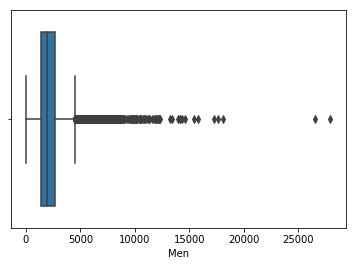

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
# for i in df_census_clean.columns:
print(sns.boxplot(x=df_census_super_clean['Men']))

In [35]:
def make_plot(df):
    df_copy = df.copy()
    for i in df_copy.columns:
        plot  = sns.boxplot(x=df_copy[i]) 
    return plt.show()


In [71]:
make_plot(df_census_super_clean['Men'])

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
f, axes = plt.subplots(3, 3)
f.set_size_inches(20,20)
sns.distplot(df.bedrooms, ax = axes[0][0])
sns.distplot(df.bathrooms, ax = axes[0][1])
sns.distplot(df.log_sqft_living, ax = axes[1][1])
sns.distplot(df.log_sqft_lot, ax = axes[2][0])
sns.distplot(df.log_sqft_living15, ax = axes[0][2])
sns.distplot(df.log_sqft_lot15, ax = axes[1][2])
sns.distplot(df.sqft_living, ax = axes[1][0])
sns.distplot(df.price, ax = axes[2][1])
sns.distplot(df.log_price, ax = axes[2][2])